In [64]:
using CLOUD, JLD2, Plots, LaTeXStrings

In [65]:
path = "../results/h_refinement/"

"../results/h_refinement/"

In [66]:
e_nmc = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mmc = load_object(string(path,"ModalMulti_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mmu = load_object(string(path,"ModalMulti_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_ntc = load_object(string(path,"NodalTensor_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_ntu = load_object(string(path,"NodalTensor_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping_p4/upwind/errors.jld2"))

3-element Vector{Float64}:
 0.050219776622717115
 0.0029822260647153096
 0.00011886991291830997

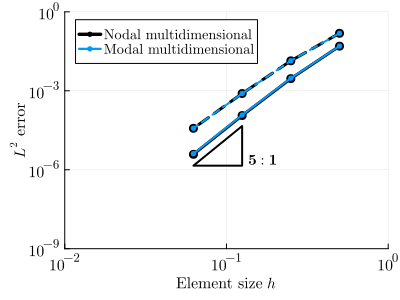

In [67]:
h = [1.0/2^n for n in eachindex(e_nmc)]

plt_m = plot(xaxis=:log10, yaxis=:log10, windowsize=(400,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=10, ytickfontsize=10, 
    xguidefontsize=10, yguidefontsize=10,
    ylabel="\$L^2\$ error", xlabel="Element size \$h\$", legend=:topleft, xlims=[1e-2,1.0],  ylims=[1e-9,10e-1])
plot!(plt_m, h, e_nmc, label="", 
    linewidth=3.0, linestyle=:dash, markershape=:circle, markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_m, h,  e_nmu, label="Nodal multidimensional", 
    linewidth=3.0, linestyle=:solid, markershape=:circle, markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_m, h,  e_mmc, label="", 
    linewidth=2.0, linestyle=:dash, markershape=:circle, markersize=3, markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt_m, h ,  e_mmu, label="Modal multidimensional", 
    linewidth=2.0, linestyle=:solid, markershape=:circle, markersize=3, markerstrokewidth=0.0, color=palette(:default)[1])
r1 = h[end]
r2 = h[end-1]
plot!(plt_m, [r1, r2, r2, r1], 1.5*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black, 
    annotations = (0.17, 2.5*r1^5, L"\mathbf{5:1}", 10))

In [68]:
e_mtu

3-element Vector{Float64}:
 0.050219776622717115
 0.0029822260647153096
 0.00011886991291830997

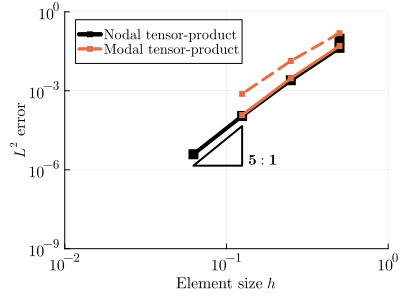

In [69]:
plt_t = plot(xaxis=:log10, yaxis=:log10, windowsize=(400,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=10, ytickfontsize=10, 
    xguidefontsize=10, yguidefontsize=10,
    ylabel="\$L^2\$ error", xlabel="Element size \$h\$", legend=:topleft, xlims=[1e-2,1.0],  ylims=[1e-9,10e-1])
plot!(plt_t, h[1:1], e_ntc, label="", #unstable for M > 2 with this timne step
    linewidth=4.0, linestyle=:dash, markershape=:square, markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_t, h[1:4],  e_ntu, label="Nodal tensor-product", 
    linewidth=4.0, linestyle=:solid, markershape=:square, markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_t, h[1:3],  e_mtc, label="", 
    linewidth=3.0, linestyle=:dash, markershape=:square, markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[1], color=palette(:default)[2])
plot!(plt_t, h[1:3] ,  e_mtu, label="Modal tensor-product", 
    linewidth=3.0, linestyle=:solid, markershape=:square, markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[1], color=palette(:default)[2])
r1 = h[end]
r2 = h[end-1]
plot!(plt_t, [r1, r2, r2, r1], 1.5*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black, 
    annotations = (0.17, 2.5*r1^5, L"\mathbf{5:1}", 10))

In [83]:
savefig(plt_m, "../plots/h_refinement/tet_p4_multi.pdf")
savefig(plt_t, "../plots/h_refinement/tet_p4_tensor.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/h_refinement/tet_p4_tensor.pdf"

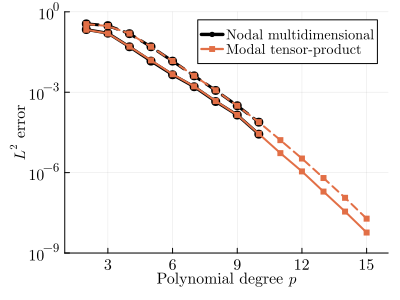

In [81]:
path = "../results/p_refinement/"

p_nm = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_nmc = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tet_SkewSymmetricMapping/upwind/errors.jld2"))
p_mt = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tet_SkewSymmetricMapping/upwind/errors.jld2"))

plt_p = plot(yaxis=:log10, windowsize=(400,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=10, ytickfontsize=10, 
    xguidefontsize=10, yguidefontsize=10, xlims=[1,16], ylims=[1e-9,1e0],
    ylabel="\$L^2\$ error", xlabel="Polynomial degree \$p\$")
    
plot!(plt_p, p_nm, e_nmu, label="Nodal multidimensional", 
    linewidth=3.0, linestyle=:solid, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_nm, e_nmc, label=:none, 
    linewidth=3.0, linestyle=:dash, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_mt, e_mtu, label="Modal tensor-product", 
    linewidth=2.0, linestyle=:solid, markershape=:square, 
    markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], 
    color=palette(:default)[2])
plot!(plt_p, p_mt, e_mtc, label=:none, 
    linewidth=2.0, linestyle=:dash, markershape=:square, 
    markersize=3, markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], 
    color=palette(:default)[2])

In [82]:
savefig(plt_p, "../plots/p_refinement/tet_M2_2_15.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/p_refinement/tet_M2_2_15.pdf"